<a href="https://colab.research.google.com/github/luccidomingues/Regression-Model-vs-Y-scrambled-Model/blob/main/Y_Scrambling_HousePrices_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Y-Scrambling for Modeling of House Prices Dataset**


*Y column is scrambled, shuffled or permutated. In plain English: "change the order of".*


# Read in data

In [ ]:
import pandas as pd

In [ ]:
projects = 'HousePrices_HalfMil.csv'
dataset = pd.read_csv(projects,sep=';')
dataset

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


# Y-Scrambling

In [ ]:
# Data set
X = dataset.drop(['precos'], axis=1)
Y = dataset.iloc[:,0]
X

# Series filter
# y = Y[Y < 0]

# y

# X.isna().sum() 
# X.dropna(inplace=True)
# Y.dropna(inplace=True)

,area,garagem,banheiros,lareira,marmore,andares
0,25,3,4,3,0,1
1,35,1,3,1,0,0
2,195,2,4,2,0,0
3,33,2,2,1,0,1
4,11,2,3,0,0,1
...,...,...,...,...,...,...
995,48,1,5,4,0,0
996,112,2,2,3,0,1
997,185,3,4,4,0,1
998,185,2,3,1,0,1


In [ ]:
Y.sample(frac=1, replace=False, random_state=0)
Y

1212930    57.7
1212931    56.1
1212932    57.6
1212933    57.3
1212934    58.8
           ... 
1222190    63.7
1222191    65.6
1222192    63.6
1222193    62.8
1222194    66.6
Name: AvgTemperature, Length: 9265, dtype: float64

# Original vs Y-scrambled model

### Model from original X-Y pairs

In [ ]:
# Model from original X-Y pairs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Luciano code
from sklearn.metrics import accuracy_score

# Data set
# X = dataset.drop(['logS'], axis=1)
# Y = dataset.iloc[:,-1]

# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Y-Shuffling


# Model building
model = LinearRegression()
model.fit(X_train, Y_train)
# Make prediction
Y_train_pred = model.predict(X_train)
# Compute R2 score
r2a = r2_score(Y_train, Y_train_pred)

# Print R2 score
print('R² = %s' % r2a.round(2))

# asd = accuracy_score(Y_train, Y_train_pred)
# print('Accuracy = %s' % ac_score.round(2))




R² = 0.65


Text(0.5, 0, 'Consumption')

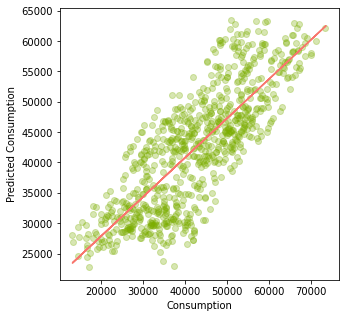

In [ ]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y_train, y=Y_train_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted Consumption')
plt.xlabel('Consumption')


### Build Y-scrambled models

In [ ]:
# Build Y-scrambled models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_train_list = []

# Data set
# X = dataset.drop(['logS'], axis=1)
# Y = dataset.iloc[:,-1]
X = dataset.drop(['precos'], axis=1)
Y = dataset.iloc[:,0]

# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

for i in range(1000):
  # Y-Shuffling
  Y_train1 = Y_train.sample(frac=1, replace=False, random_state=i)
  # Model building
  model = LinearRegression()
  model.fit(X_train, Y_train1)
  # Make prediction
  Y_train_pred = model.predict(X_train)
  # Compute R2 score
  r2b = r2_score(Y_train1, Y_train_pred)
  r2_train_list.append(r2b)
# Print R2 score
r2_train_list

[0.01787700290028138,
 0.011104958594101655,
 0.0039477691493414735,
 0.003791591797456806,
 0.004401762395953246,
 0.007546950749520609,
 0.007115789973096809,
 0.013150207955662685,
 0.0013944864443689031,
 0.010093448560699603,
 0.002510924780903867,
 0.0035309755754432404,
 0.004245012826625261,
 0.00723290662611753,
 0.010726325115150037,
 0.01005414057333498,
 0.00663574570313441,
 0.00819773047420147,
 0.006167193332570653,
 0.009969517934703576,
 0.01239107382134419,
 0.004943414671928825,
 0.004646490718648422,
 0.008086168179190723,
 0.005207988298749022,
 0.0036339943685420595,
 0.016020616334614712,
 0.006577235037950602,
 0.0034864212512755177,
 0.0020454996960627136,
 0.008640341933623508,
 0.005011485844160224,
 0.0020267676978404925,
 0.002433686560098236,
 0.006036291761460699,
 0.009991631129291134,
 0.01144199868708673,
 0.015008593261479741,
 0.00410520690348537,
 0.00449058299269578,
 0.002027079448753355,
 0.007772428222044048,
 0.013137569351800327,
 0.0089846607

[(0.0, 1.0)]

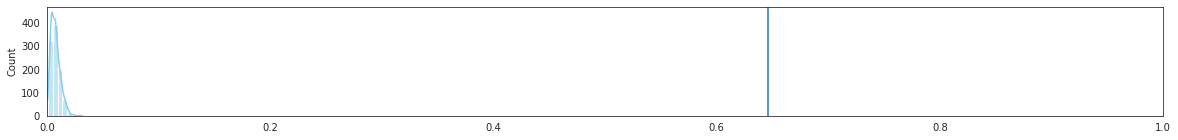

In [ ]:
# Histogram plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
plt.figure(figsize = (20, 2)) 

ax = sns.histplot(data=r2_train_list, color="skyblue", kde=True, bins = 7)
plt.axvline(r2a)
ax.set(xlim=(0, 1))